Workbook for final project - Intro to machine learning - Dustin Kopp


### Initial setup

In [76]:
# %load feature_selection.py
#!/usr/bin/python
import sys
sys.path.append("./tools/")

from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, precision_score, recall_score



def lasso_regression(features, labels):
    regression = Lasso()
    regression.fit(features, labels)
    print regression.coef_
    return regression.coef_

In [98]:
# Load my local files
import sys
sys.path.append("./tools/")


# Import some libraries and functions
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd

# Import local functions
from feature_format import featureFormat
from feature_format import targetFeatureSplit
from feature_selection import lasso_regression

# Load dictionary with data
data_dict = pickle.load(open('final_project_dataset.pkl', 'r'))

# Create local copy so original stays intact 
my_dataset = data_dict 

# Instantiate main feature list, POI must be first feature
initial_feature_list = ['poi'] 

# Create a pandas dataframe for ease of use in this workbook, convert numeric fields to numbers
my_dataframe = pd.DataFrame(my_dataset).T

# Eliminate email_address feature since its just another identifier
my_dataframe.drop(columns=['email_address'], inplace=True)

# Convert features to numeric values
my_dataframe = my_dataframe.apply(pd.to_numeric, errors='coerce')



### Explore the data

In [105]:
total_record_count = len(my_dataset)
total_feature_count = len(my_dataset[my_dataset.keys()[0]])
poi_dataframe = my_dataframe[my_dataframe['poi'] == 1]
total_poi_count = len(poi_dataframe)

print 'Total Records: {}'.format(total_record_count)
print 'Total Features: {}'.format(total_feature_count)
print 'Total POIs: {}'.format(total_poi_count)

# Create a copy replacing the financial NaNs with 0
my_dataframe_noNaN = my_dataframe.fillna(0)

for idx, row in my_dataframe_noNaN.iterrows():
    if row.sum() == 0:
        print idx


Total Records: 146
Total Features: 21
Total POIs: 18
CHAN RONNIE
LOCKHART EUGENE E


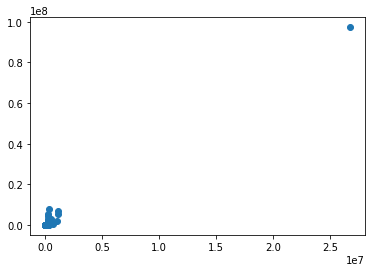

In [106]:
# Looking through the values I see 2 that I dont think will help me The Travel Agency in the Park and Eugene 
# Lockhart. I was tempted to remove Ronnie Chan as well but he had values that happened to sum to 0. This may be relavent. 

my_dataframe_noNaN.drop(index='LOCKHART EUGENE E', inplace=True)
my_dataframe_noNaN.drop(index='THE TRAVEL AGENCY IN THE PARK', inplace=True)

# plot out a couple of the interesting values
plt.scatter(my_dataframe_noNaN['salary'], my_dataframe_noNaN['bonus'])

Fairly obvious outlier there, turned out to be the TOTAL column from the spreadsheet. I will remove it.

In [107]:
my_dataframe_noNaN.drop(index='TOTAL', inplace=True)

Text(0.5,0,'Salary')

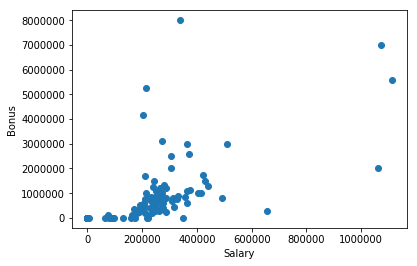

In [108]:
# plot out without the outlier 
plt.scatter(my_dataframe_noNaN['salary'], my_dataframe_noNaN['bonus'])
plt.ylabel('Bonus')
plt.xlabel('Salary')

Lets plot that and color code it based on POI = Yellow or non-POI = purple

Text(0.5,0,'Salary')

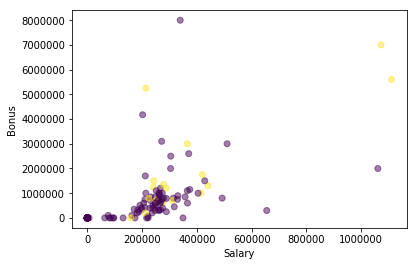

In [109]:
plt.scatter(my_dataframe_noNaN['salary'], my_dataframe_noNaN['bonus'], c=my_dataframe_noNaN['poi'], alpha=0.5)
plt.ylabel('Bonus')
plt.xlabel('Salary')

Now to plot some other datapoints. 

Text(0.5,0,'Total Payments')

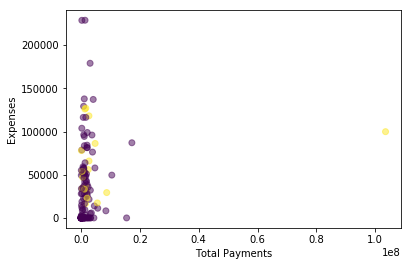

In [129]:
plt.scatter(my_dataframe_noNaN['total_payments'], my_dataframe_noNaN['expenses'], c=my_dataframe_noNaN['poi'], alpha=0.5)
plt.ylabel('Expenses')
plt.xlabel('Total Payments')

Text(0,0.5,'restricted stock')

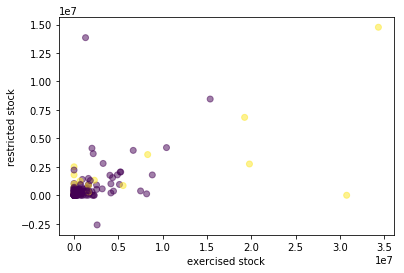

In [133]:
plt.scatter(my_dataframe_noNaN['exercised_stock_options'], my_dataframe_noNaN['restricted_stock'], c=my_dataframe_noNaN['poi'], alpha=0.5)
plt.xlabel('exercised stock')
plt.ylabel('restricted stock')

Text(0,0.5,'total sent to POI')

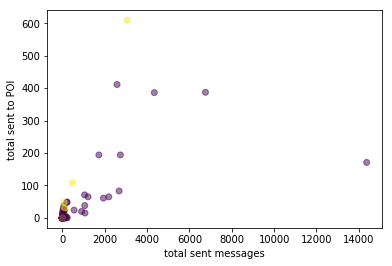

In [136]:
plt.scatter(my_dataframe_noNaN['from_messages'], my_dataframe_noNaN['from_this_person_to_poi'], c=my_dataframe_noNaN['poi'], alpha=0.5)
plt.xlabel('total sent messages')
plt.ylabel('total sent to POI')


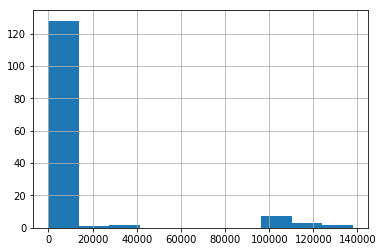

In [137]:
my_dataframe_noNaN['director_fees'].hist() 